In [119]:
from tensorflow.keras.datasets import fashion_mnist
# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
# 5: Sandal
# 6: Shirt
# 7: Sneaker
# 8: Bag
# 9: Ankle boot

In [109]:
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [121]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [122]:
a=x_train[0]

In [123]:
px.imshow(a)

In [124]:
y_train[0] 

9

In [125]:
x_train.shape

(60000, 28, 28)

In [126]:
y_train.shape

(60000,)

In [128]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [129]:
from tensorflow.keras.utils import to_categorical

In [130]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [131]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [132]:
x_train=x_train/255
x_test=x_test/255

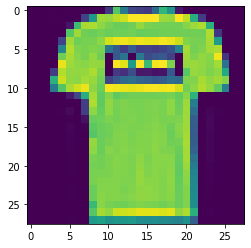

In [133]:
plt.imshow(x_train[1])

In [134]:
y_train[1]

0

In [135]:
x_train=x_train.reshape(60000,28,28,1)

In [136]:
x_test.shape

(10000, 28, 28)

In [137]:
x_test=x_test.reshape(10000,28,28,1)

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [139]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [140]:
from tensorflow.keras.callbacks import EarlyStopping

In [141]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [142]:
model.fit(x_train,y_train_cat,epochs=100,validation_data=(x_test,y_test_cat),callbacks=[early_stop])

Epoch 1/100
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4198 - accuracy: 0.8501 - val_loss: 0.3516 - val_accuracy: 0.8717
Epoch 2/100
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2840 - accuracy: 0.8975 - val_loss: 0.2989 - val_accuracy: 0.8906
Epoch 3/100
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2401 - accuracy: 0.9110 - val_loss: 0.2836 - val_accuracy: 0.8960
Epoch 4/100
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2067 - accuracy: 0.9228 - val_loss: 0.2584 - val_accuracy: 0.9056
Epoch 5/100
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1787 - accuracy: 0.9340 - val_loss: 0.2624 - val_accuracy: 0.9062
Epoch 6/100
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1553 - accuracy: 0.9419 - val_loss: 0.2643 - val_accuracy: 0.9096


In [143]:
import pandas as pd
history=pd.DataFrame(data=model.history.history)

In [144]:
history

,loss,accuracy,val_loss,val_accuracy
0,0.419828,0.850150,0.351634,0.8717
1,0.284012,0.897533,0.298899,0.8906
2,0.240133,0.911017,0.283627,0.8960
3,0.206692,0.922817,0.258403,0.9056
4,0.178748,0.934033,0.262393,0.9062
5,0.155339,0.941850,0.264342,0.9096


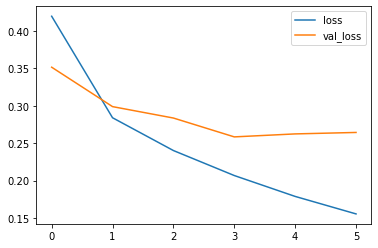

In [145]:
history[['loss','val_loss']].plot()

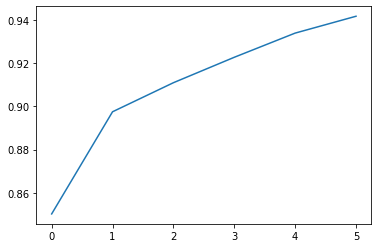

In [146]:
history['accuracy'].plot()

In [147]:
prediction=model.predict_classes(x_test)

In [148]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [149]:
sample=x_train[888]

In [150]:
sample.shape

(28, 28, 1)

In [151]:
sample=sample.reshape(28,28)

In [152]:
sample.shape

(28, 28)

In [155]:
px.imshow(sample)

In [156]:
y_test[888]

4

In [157]:
import plotly.express as px
px.imshow(sample)

In [158]:
from sklearn.metrics import classification_report

In [159]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.86      0.85      0.85      1000
           3       0.89      0.95      0.92      1000
           4       0.87      0.84      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.67      0.73      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [160]:
from sklearn.metrics import confusion_matrix

In [161]:
cm=confusion_matrix(y_test,prediction)

In [162]:
cm

array([[909,   0,  11,  13,   3,   1,  57,   1,   5,   0],
       [  3, 974,   0,  19,   2,   0,   0,   0,   2,   0],
       [ 26,   1, 849,   8,  54,   0,  61,   0,   1,   0],
       [ 16,   0,   9, 948,  13,   0,  12,   0,   2,   0],
       [  3,   1,  66,  37, 839,   0,  54,   0,   0,   0],
       [  0,   0,   0,   0,   0, 978,   0,  15,   0,   7],
       [174,   0,  53,  32,  55,   0, 674,   0,  12,   0],
       [  0,   0,   0,   0,   0,   6,   0, 968,   0,  26],
       [  4,   0,   1,   3,   0,   3,   1,   1, 987,   0],
       [  0,   0,   0,   0,   0,   5,   0,  24,   1, 970]])